# <font color=blue> Estimating Laptop Price Based on User Input Configuration </font>

In [4020]:
import numpy as np
import pandas as pd

In [4021]:
df = pd.read_csv('laptop_data.csv')

In [4022]:
df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4023]:
df.shape

(1303, 12)

In [4024]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4026]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4027]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
792,792,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,104961.6000
1001,1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg,63349.9200
139,139,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,37242.7200
1058,1058,Dell,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,69210.7200
1083,1083,HP,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg,109170.7200
721,721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,44574.0480
880,880,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,90576.0000
311,311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21kg,133146.7200
103,103,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38kg,59620.3200
167,167,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,56502.9072


In [4028]:
df.duplicated().sum()

0

In [4029]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Preprocessing

In [4030]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [4031]:
df.sort_values(by=['Price'],ascending=False)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.720
830,830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,292986.720
610,610,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,261018.720
749,749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,233845.920
1066,1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,211788.000
...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,10602.720
31,31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.720
1120,1120,Vero,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,10442.880
20,20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,10224.432


In [4032]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4033]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [4034]:
df.select_dtypes(include='object')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3
1300,Lenovo,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5
1301,HP,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19


In [4035]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [4036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [4037]:
df.nunique()

Company              19
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              171
Price               791
dtype: int64

# Exploratory Data Analysis
### initial investigation to discover patterns, spot anomalies, test hypothesis and check assumptions

In [4038]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

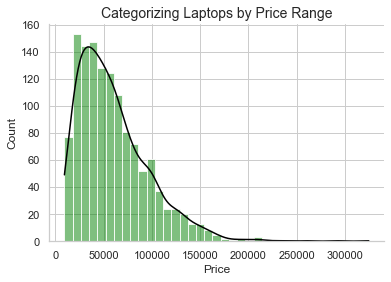

In [4039]:
sns.set(style="whitegrid")
ax = sns.histplot(df['Price'], kde=True, color='green', fill=True)
ax.lines[0].set_color('black')
plt.title("Categorizing Laptops by Price Range", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

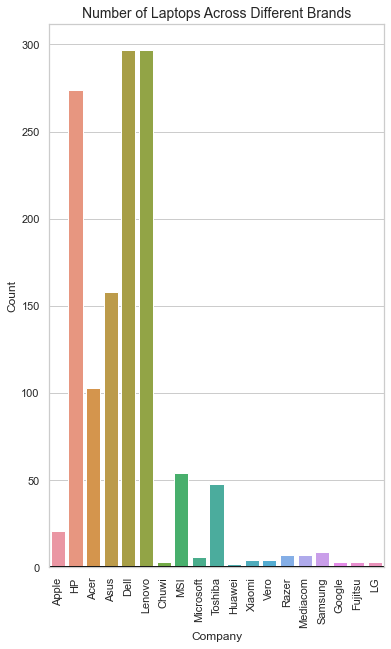

In [4040]:
plt.figure(figsize=(6, 10))
ax = sns.countplot(data=df, x='Company')
plt.title("Number of Laptops Across Different Brands", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.axhline(0, color='black', linewidth=2)
plt.show()

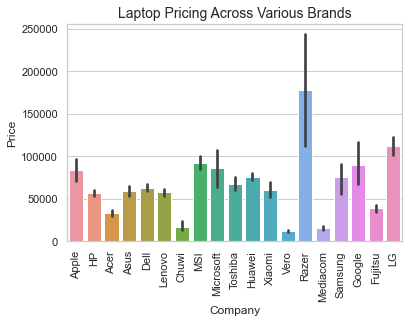

In [4041]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Laptop Pricing Across Various Brands',fontsize=14)
plt.show()

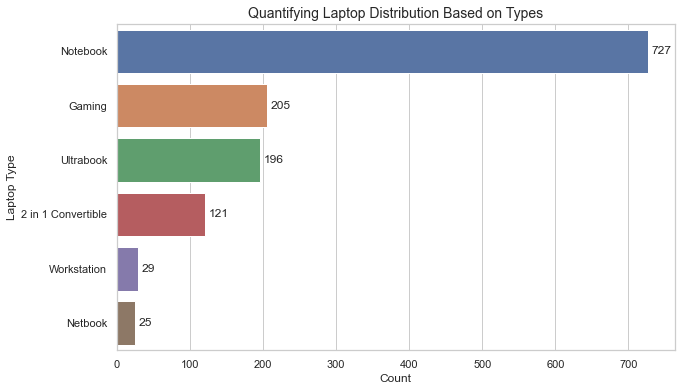

In [4042]:
type_counts = df['TypeName'].value_counts()
sorted_order = type_counts.index

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.countplot(y='TypeName', data=df, order=sorted_order)

for p in plot.patches:
    x_position = p.get_width() + 5  # Add a small gap between bar and text
    y_position = p.get_y() + p.get_height() / 2  # Center text vertically
    count = format(p.get_width(), '.0f')  # Get the count as a string
    plot.annotate(count, (x_position, y_position), ha='left', va='center')

plt.title("Quantifying Laptop Distribution Based on Types", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Laptop Type", fontsize=12)
plt.show()

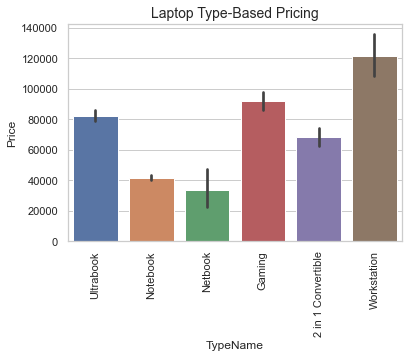

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Laptop Type-Based Pricing',fontsize=14)
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=df, x='Inches', kde=True, bins=10, color='blue', edgecolor='skyblue')

plt.xlabel('Inches')
plt.ylabel('Count')
plt.title('Distribution of Inches', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

mean_height = df['Inches'].mean()
plt.axvline(mean_height, color='black', linestyle='dashed', linewidth=1.5)
plt.text(mean_height + 0.2, 1, f'Mean: {mean_height:.2f}', color='black', fontsize=14)
ax.lines[0].set_color('crimson')
plt.legend(['Quantifying Screen Sizes'], fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

scatter = sns.scatterplot(x=df['Inches'], y=df['Price'], color='b', alpha=0.9)
plt.title('Scatter Plot of Screen-Size vs. Price', fontsize=16)
plt.xlabel('Inches', fontsize=14)
plt.ylabel('Price', fontsize=14)
scatter.grid(True)
scatter.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.regplot(x=df['Inches'], y=df['Price'], scatter=False, color='crimson')

plt.legend(['Data', 'Regression Line'])
plt.tight_layout()
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

# Feature Engineering
### leverages data to create new variables

#### - creating a new column Touchscreen with value 1 if touchscreen is available, else 0

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.head()

In [ ]:
df.sample(5)

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar', color=['blue', 'green'],alpha=0.8)
plt.title('Laptop: Touchscreen or Non-Touchscreen?', fontsize=14)
legend_labels = ['No Touchscreen', 'Touchscreen']
legend_handles = [plt.Rectangle((0,0),1,1, color='blue'), plt.Rectangle((0,0),1,1, color='green')]
plt.legend(legend_handles, legend_labels, loc='upper right')
plt.xticks(rotation=360)
plt.xlabel('Touchscreen')
plt.ylabel('Count')
plt.show()

In [ ]:
ax = sns.barplot(x=df['Touchscreen'], y=df['Price'], hue=df['Touchscreen'], palette={0: 'blue', 1: 'green'},alpha=0.9)
handles = ax.get_legend_handles_labels()[0]
labels = ['No Touchscreen', 'Touchscreen']
ax.legend(handles=handles, labels=labels)
plt.title('Laptop Price by TouchScreen', fontsize=14)
plt.tight_layout()
plt.show()

#### - creating a new column IPS with value 1 if IPS panel is available, else 0

In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.head()

In [ ]:
df['Ips'].value_counts().plot(kind='bar', color=['blue', 'green'],alpha=0.8)
plt.xticks(ticks=[0, 1], labels=['Non-TouchScreen', 'TouchScreen'])
legend_labels = ['Non Touchscreen', 'Touchscreen']
legend_handles = [plt.Rectangle((0,0),1,1, color='blue'), plt.Rectangle((0,0),1,1, color='green')]
plt.legend(legend_handles, legend_labels, loc='upper right')
plt.title("IPS Count based on Touchscreen",fontsize='14')
plt.ylabel('IPS.count')
plt.xlabel('Touchscreen')
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.barplot(x=df['Ips'], y=df['Price'], hue=df['Ips'],palette={0: 'blue', 1: 'green'},alpha=0.9)
plt.xticks(ticks=[0, 1], labels=['Non-IPS', 'IPS'])
handles = ax.get_legend_handles_labels()[0]
labels = [ 'Other display','IPS display']
ax.legend(handles=handles, labels=labels)
plt.title('Laptop Price by IPS', fontsize=14)
plt.xlabel('Touchscreen')
plt.xlabel('Display Type')
plt.tight_layout()
plt.show()

#### - Extracting X resolution and Y resolution from the ScreenResolution

In [ ]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.head()

In [ ]:
df.sample(5)

In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

In [ ]:
df.corr()['Price']

#### - Adding new feature ppi

In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.corr()['Price']

In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

In [ ]:
df['Cpu'].value_counts()
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.head()

#### - Function to summarize different CPUs

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

cpu_counts = df['Cpu brand'].value_counts()
cpu_counts.plot(kind='bar', color=sns.color_palette("husl", 9))

plt.title('CPU Brand Counts', fontsize=14)
plt.xlabel('CPU Brand', fontsize=12,fontweight='bold')
plt.ylabel('Brand.Count', fontsize=12,fontweight='bold')

for index, value in enumerate(cpu_counts):
    plt.text(index, value + 2, str(value), ha='center', fontsize=10)

sns.despine()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(x=df['Cpu brand'],y=df['Price'],palette=sns.color_palette("husl", 5))
plt.xticks(rotation='horizontal')
plt.title('CPU Brand distribution Prices', fontsize=14)
plt.xlabel('CPU Brand', fontsize=12,fontweight='bold')
plt.ylabel('Brand.Price', fontsize=12,fontweight='bold')
sns.despine()
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

In [ ]:
ram_value_counts = df['Ram'].value_counts()
ram_value_counts.plot(kind='bar',width=0.9, color=sns.color_palette("husl", 9))

plt.title('RAM Distribution', fontsize=14)
plt.xlabel('RAM Size')
plt.ylabel('Frequency')
plt.xticks(rotation='horizontal')

for i, count in enumerate(ram_value_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=df['Ram'], y=df['Price'], palette="viridis")

plt.title('RAM Distribution by Price', fontsize=14)
plt.xlabel('RAM Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation='horizontal')
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
df['Memory'].value_counts()

#### - Transfrom Memory to HDD, SDD, FLASH and HYBRID

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.corr()['Price']

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.head()

In [ ]:
df['Gpu'].value_counts()

#### Extracting Brand Name from GPU

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

In [ ]:
df['Gpu brand'].value_counts()

In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median, palette=sns.color_palette("husl", 3))
plt.xlabel('GPU Brand', fontsize=12,fontweight='bold')
plt.ylabel('Price', fontsize=12,fontweight='bold')
plt.title('GPU Price distribution', fontsize=14)
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

In [ ]:
df['OpSys'].value_counts()

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('OpSys Price distribution', fontsize=14)
plt.xlabel('Operating System', fontsize=12,fontweight='bold')
plt.ylabel('Price', fontsize=12,fontweight='bold')
plt.show()

#### function to summarizing OS

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('Operating System', fontsize=12,fontweight='bold')
plt.ylabel('Price', fontsize=12,fontweight='bold')
plt.title('OpSys Price distribution', fontsize=14)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.histplot(data=df, x='Weight', kde=True, color='blue')
ax.lines[0].set_color('crimson')
plt.xlabel('Weight', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Quantifying Laptops Based on Weight', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter(df, x='Weight', y='Price', title='Scatter Plot of Weight vs Price')
fig.update_traces(marker=dict(size=9, opacity=0.7, color='blue', symbol='circle'))
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Weight',
    yaxis_title='Price',
    showlegend=False,
)
fig.show()

In [ ]:
df.corr()['Price']

# Visualizing correlation

In [ ]:
import plotly.express as px

correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='Viridis')

fig.update_layout(title="Correlation Heatmap",
                  xaxis_title="Features",
                  yaxis_title="Features")

fig.show()

In [ ]:
ax=sns.histplot(data=df, x='Price', kde=True,  color='blue', edgecolor='white')
ax.lines[0].set_color('crimson')
plt.title('Distribution of Price',fontsize=14)

In [ ]:
ax = sns.histplot(np.log(df['Price']), kde=True,color='blue')
ax.lines[0].set_color('crimson')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.title('Distribution of Log Price',fontsize=14)
plt.show()

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

In [ ]:
y

In [ ]:
df.to_csv("clean.csv")

# Machine learning modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [ ]:
X_train

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [ ]:
# df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

    # Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Ridge Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Lasso Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Gradient Boost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Exporting the Model

In [ ]:
import pickle
# Save DataFrame to a pickle file
with open('df.pkl', 'wb') as df_file:
    pickle.dump(df, df_file)
# Save pipeline to a pickle file
with open('pipe.pkl', 'wb') as pipe_file:
    pickle.dump(pipe, pipe_file)

In [ ]:
df

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test